In [1]:
import pandas as pd
essays = pd.read_csv('trained.csv')
essays.set_index('essay_id',inplace=True, drop=True)

X = essays.drop(['domain1_score','essay','essay_set','normal_score'], axis=1)
y = essays['normal_score']
X.head()

,misspelt,correct,length,lexical_diversity,n_sentences,nouns,verbs,adverbs,adjectives,wordnetscore
essay_id,,,,,,,,,,
14834,6,116,123,1.37,9,28,14,8,10,3
14835,11,169,180,1.55,10,41,23,12,14,6
14836,3,163,169,1.62,9,39,23,10,9,24
14837,18,175,199,1.69,11,35,26,7,4,4
14838,4,158,162,1.74,11,35,26,8,15,8


In [4]:
X.corr()

,misspelt,correct,length,lexical_diversity,n_sentences,nouns,verbs,adverbs,adjectives,wordnetscore
misspelt,1.000000,0.602140,0.676321,0.382880,0.588399,0.642947,0.568042,0.519617,0.573739,0.334757
correct,0.602140,1.000000,0.994839,0.712956,0.773040,0.932296,0.903186,0.714850,0.774220,0.609209
length,0.676321,0.994839,1.000000,0.704630,0.784995,0.938852,0.901898,0.719716,0.780865,0.600038
lexical_diversity,0.382880,0.712956,0.704630,1.000000,0.505644,0.676668,0.641545,0.325514,0.382316,0.394189
n_sentences,0.588399,0.773040,0.784995,0.505644,1.000000,0.736195,0.716002,0.603293,0.649538,0.466756
nouns,0.642947,0.932296,0.938852,0.676668,0.736195,1.000000,0.817120,0.600808,0.706491,0.561738
verbs,0.568042,0.903186,0.901898,0.641545,0.716002,0.817120,1.000000,0.640746,0.638468,0.574863
adverbs,0.519617,0.714850,0.719716,0.325514,0.603293,0.600808,0.640746,1.000000,0.682086,0.514460
adjectives,0.573739,0.774220,0.780865,0.382316,0.649538,0.706491,0.638468,0.682086,1.000000,0.490983
wordnetscore,0.334757,0.609209,0.600038,0.394189,0.466756,0.561738,0.574863,0.514460,0.490983,1.000000


In [5]:
from sklearn.model_selection import train_test_split
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

In [6]:
regression_model.coef_

array([ 0.04124149,  0.04531016, -0.04619915, -0.19174018,  0.01920383,
        0.02192664,  0.00828597,  0.02665853,  0.03355809,  0.10296543])

In [7]:
from sklearn.metrics import r2_score,accuracy_score
print(regression_model.score(X_test, y_test))
y_pred = regression_model.predict(X_test)

0.5579870370390927


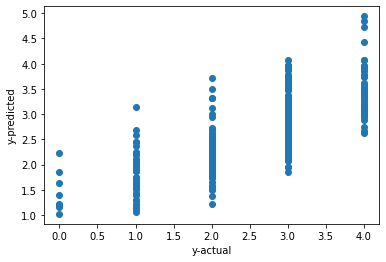

In [8]:
from matplotlib import pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('y-actual')
plt.ylabel('y-predicted')
plt.show()

In [11]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
for val in range(1,6):
    poly_reg = PolynomialFeatures(degree=val)
    X_poly = poly_reg.fit_transform(X_train)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y_train)
    y_predict = pol_reg.predict(poly_reg.transform(X_test))
    print("rmse = {}",math.sqrt(mean_squared_error(y_predict, y_test)))
    print("r2_score = {}",r2_score(y_test,y_predict))

rmse = {} 0.6452108843873099
r2_score = {} 0.5579870370390927
rmse = {} 0.6341223374205692
r2_score = {} 0.5730492905905447
rmse = {} 0.7338689037845061
r2_score = {} 0.42816779939974847
rmse = {} 4.842328064299631
r2_score = {} -23.89660072314086
rmse = {} 90.10700006927077
r2_score = {} -8619.822393972388


In [12]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf_random = RandomForestClassifier(criterion='entropy', 
                            n_estimators=1000, 
                            min_samples_leaf=4, 
                            min_samples_split=2, 
                            max_features='auto',
                            max_depth=None,
                            bootstrap=True,
                            random_state=2)

# Fit rf to the training set    
rf_random.fit(X_train, y_train)

# predict
y_pred = rf_random.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Confusion Matrix ===
[[  2   5   2   0   0]
 [  1  12  20   8   0]
 [  1   3  39  34   4]
 [  0   0  10 138  21]
 [  0   0   0  24  36]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           1       0.60      0.29      0.39        41
           2       0.55      0.48      0.51        81
           3       0.68      0.82      0.74       169
           4       0.59      0.60      0.60        60

    accuracy                           0.63       360
   macro avg       0.58      0.48      0.51       360
weighted avg       0.62      0.63      0.61       360





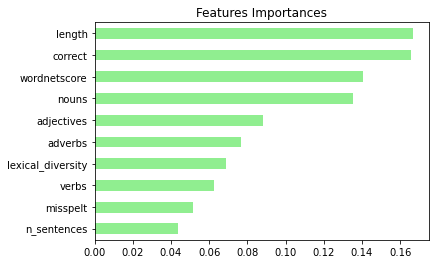

In [16]:
from matplotlib import pyplot as plt
 
importances = pd.Series(data=rf_random.feature_importances_, index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [44]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [32]:
regression_model.intercept_

2.7276764202821226

In [33]:
regression_model.coef_

array([ 0.45249701, -0.05392417,  0.07036734,  0.30019698,  0.28291999,
        0.24711972,  0.11554341,  0.04244274,  0.04244274,  0.0858835 ])

In [45]:
from sklearn.metrics import r2_score,accuracy_score
print(regression_model.score(X_test, y_test))
y_pred = regression_model.predict(X_test)

0.5495279120543642


In [35]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse
import math

math.sqrt(regression_model_mse)

0.6479748302369933

In [12]:
from sklearn.preprocessing import PolynomialFeatures
for val in range(1,10):
    poly_reg = PolynomialFeatures(degree=val)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    y_predict = pol_reg.predict(X_poly)
    print("rmse = {}",math.sqrt(mean_squared_error(y_predict, y)))
    print("r2_score = {}",r2_score(y,y_predict))

rmse = {} 0.6306914822024646
r2_score = {} 0.5775576192409284
rmse = {} 0.5916091127038631
r2_score = {} 0.6282908429967584
rmse = {} 0.5599185349430765
r2_score = {} 0.6670467653220038
rmse = {} 0.45790600811189314
r2_score = {} 0.7773174253770506
rmse = {} 0.07276465032099905
r2_score = {} 0.994376917654697
rmse = {} 0.005536705011815039
r2_score = {} 0.9999674436040911
rmse = {} 0.01099655740002152
r2_score = {} 0.9998715757490952
rmse = {} 0.010830575662900015
r2_score = {} 0.9998754233547262
rmse = {} 0.019829554872429184
r2_score = {} 0.9995824009702223


In [36]:
for val in range(1,10):
    poly_reg = PolynomialFeatures(degree=val)
    X_poly = poly_reg.fit_transform(X_train)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y_train)
    y_predict = pol_reg.predict(poly_reg.transform(X_test))
    print("rmse = {}",math.sqrt(mean_squared_error(y_predict, y_test)))
    print("r2_score = {}",r2_score(y_test,y_predict))

rmse = {} 0.6479748302369933
r2_score = {} 0.5541919471699362
rmse = {} 0.6213099581088788
r2_score = {} 0.5901279870533731
rmse = {} 0.750309857306848
r2_score = {} 0.4022591454731427
rmse = {} 7.5425161643890295
r2_score = {} -59.403782497731
rmse = {} 274.90072371708584
r2_score = {} -80237.61104262668
rmse = {} 2313.5611316403106
r2_score = {} -5683207.571479998
rmse = {} 2853.959339945022
r2_score = {} -8648228.356563177
rmse = {} 58674.84588876458
r2_score = {} -3655405415.9515615
rmse = {} 60677.866523718694
r2_score = {} -3909239158.174019


In [14]:
X.corr()

,length,lexical_diversity,n_sentences,wordnetscore,correctN,misspeltN,nounsN,verbsN,adverbsN,adjectivesN
length,1.000000,0.704630,0.784995,0.600038,-0.116262,0.108707,0.022393,0.048700,0.048700,0.044306
lexical_diversity,0.704630,1.000000,0.505644,0.394189,0.044281,-0.057293,0.044152,-0.190167,-0.190167,-0.219457
n_sentences,0.784995,0.505644,1.000000,0.466756,-0.167746,0.163243,0.003968,0.095274,0.095274,0.090742
wordnetscore,0.600038,0.394189,0.466756,1.000000,0.037196,-0.025936,0.021304,0.132317,0.132317,0.056399
correctN,-0.116262,0.044281,-0.167746,0.037196,1.000000,-0.955984,-0.045721,0.016804,0.016804,-0.075020
misspeltN,0.108707,-0.057293,0.163243,-0.025936,-0.955984,1.000000,0.031232,0.019553,0.019553,0.105793
nounsN,0.022393,0.044152,0.003968,0.021304,-0.045721,0.031232,1.000000,-0.303579,-0.303579,-0.095574
verbsN,0.048700,-0.190167,0.095274,0.132317,0.016804,0.019553,-0.303579,1.000000,1.000000,0.228514
adverbsN,0.048700,-0.190167,0.095274,0.132317,0.016804,0.019553,-0.303579,1.000000,1.000000,0.228514
adjectivesN,0.044306,-0.219457,0.090742,0.056399,-0.075020,0.105793,-0.095574,0.228514,0.228514,1.000000
